In [1]:
import pandas as pd

# Replace 'your_dataset.csv' with the path to your earthquake dataset file
file_path = 'merge.csv'

# Load the dataset
earthquake_data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
print(earthquake_data.head())
print(earthquake_data.info())

C:\Users\Admin\AppData\Local\Temp\ipykernel_8736\3439843406.py:7: DtypeWarning: Columns (7,11,13,14,24,25,26,30,31) have mixed types. Specify dtype option on import or set low_memory=False.
  earthquake_data = pd.read_csv(file_path)


  network_code receiver_code receiver_type  receiver_latitude  \
0           TA          109C            HH            32.8889   
1           TA          109C            HH            32.8889   
2           TA          109C            HH            32.8889   
3           TA          109C            HH            32.8889   
4           TA          109C            HH            32.8889   

   receiver_longitude  receiver_elevation_m  p_arrival_sample p_status  \
0           -117.1051                 150.0               NaN      NaN   
1           -117.1051                 150.0               NaN      NaN   
2           -117.1051                 150.0               NaN      NaN   
3           -117.1051                 150.0               NaN      NaN   
4           -117.1051                 150.0               NaN      NaN   

   p_weight  p_travel_sec  ...  source_magnitude_author  \
0       NaN           NaN  ...                      NaN   
1       NaN           NaN  ...                

In [2]:
a=earthquake_data[0:235428]
b=earthquake_data[235428:335428]
b.info

<bound method DataFrame.info of        network_code receiver_code receiver_type  receiver_latitude  \
235428           TA          109C            BH          32.888900   
235429           TA          109C            BH          32.888900   
235430           TA          109C            BH          32.888900   
235431           TA          109C            BH          32.888900   
235432           TA          109C            BH          32.888900   
...             ...           ...           ...                ...   
335423           PB          B082            EH          33.598182   
335424           PB          B082            EH          33.598182   
335425           PB          B082            EH          33.598182   
335426           PB          B082            EH          33.598182   
335427           PB          B082            EH          33.598182   

        receiver_longitude  receiver_elevation_m  p_arrival_sample p_status  \
235428         -117.105100                 150.0

In [3]:
import pandas as pd

# Assuming you've already loaded your dataset into a DataFrame named earthquake_data

# Feature attributes
features = b[['source_latitude', 'source_longitude', 'source_depth_km', 'source_origin_time']]
# Extracting hour from 'source_origin_time'
features['hour'] = pd.to_datetime(b['source_origin_time']).dt.hour

# Target attribute
target = b['source_magnitude']

print("Features Preview:")
print(features.head())
print("\nTarget Preview:")
print(target.head())

Features Preview:
        source_latitude  source_longitude  source_depth_km  \
235428          32.7253         -116.0348            12.66   
235429          32.7063         -116.0241            11.50   
235430          31.9679         -117.1944             7.26   
235431          32.8312         -115.9603             9.73   
235432          32.8297         -115.9531             2.10   

            source_origin_time  hour  
235428  2006-11-03 16:12:12.44    16  
235429  2006-11-14 13:32:14.26    13  
235430  2006-11-27 10:46:29.92    10  
235431  2006-11-29 12:17:35.10    12  
235432  2006-11-29 21:10:55.02    21  

Target Preview:
235428    3.6
235429    3.8
235430    3.6
235431    3.8
235432    4.1
Name: source_magnitude, dtype: float64


C:\Users\Admin\AppData\Local\Temp\ipykernel_8736\3573556269.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['hour'] = pd.to_datetime(b['source_origin_time']).dt.hour


In [4]:
import pandas as pd

# Assuming earthquake_data is your DataFrame
# Step 1: Drop rows with any missing values in the specified columns
cleaned_data = b.dropna(subset=['source_latitude', 'source_longitude', 'source_depth_km', 'source_origin_time', 'source_magnitude'])

# Now that the data is cleaned, you can safely extract the hour from 'source_origin_time'
# Convert 'source_origin_time' to datetime and extract the hour
cleaned_data['hour'] = pd.to_datetime(cleaned_data['source_origin_time']).dt.hour

# Step 2: Separate features and target in the cleaned dataset
features = cleaned_data[['source_latitude', 'source_longitude', 'source_depth_km', 'hour']]
target = cleaned_data['source_magnitude']

print("Features Preview:")
print(features.head())
print("\nTarget Preview:")
print(target.head())


Features Preview:
        source_latitude  source_longitude  source_depth_km  hour
235428          32.7253         -116.0348            12.66    16
235429          32.7063         -116.0241            11.50    13
235430          31.9679         -117.1944             7.26    10
235431          32.8312         -115.9603             9.73    12
235432          32.8297         -115.9531             2.10    21

Target Preview:
235428    3.6
235429    3.8
235430    3.6
235431    3.8
235432    4.1
Name: source_magnitude, dtype: float64


C:\Users\Admin\AppData\Local\Temp\ipykernel_8736\168221100.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['hour'] = pd.to_datetime(cleaned_data['source_origin_time']).dt.hour


In [5]:
from sklearn.preprocessing import StandardScaler

# Assuming 'features' is your DataFrame containing the feature attributes
scaler = StandardScaler()

# Fit the scaler to your data and transform it
normalized_features = scaler.fit_transform(features)

# If you want to convert it back to a DataFrame
normalized_features_df = pd.DataFrame(normalized_features, columns=features.columns)

print("Normalized Features Preview:")
print(normalized_features_df.head())

Normalized Features Preview:
   source_latitude  source_longitude  source_depth_km      hour
0        -0.071357         -0.121336        -0.154083  0.682851
1        -0.072570         -0.121151        -0.206473  0.246810
2        -0.119707         -0.141372        -0.397968 -0.189230
3        -0.064597         -0.120049        -0.286413  0.101463
4        -0.064693         -0.119924        -0.631015  1.409586


In [6]:
from sklearn.model_selection import train_test_split

# Assuming 'normalized_features' and 'target' are your features and target variables
# Split the dataset into 80% training and 20% testing, you can adjust the 'test_size' parameter as needed
X_train, X_test, y_train, y_test = train_test_split(normalized_features, target, test_size=0.2, random_state=42)

# Now you have X_train (features for training), X_test (features for testing),
# y_train (target for training), and y_test (target for testing)

# Display the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (79996, 4)
Shape of X_test: (20000, 4)
Shape of y_train: (79996,)
Shape of y_test: (20000,)


C:\Users\Admin\AppData\Local\Temp\ipykernel_8736\3910319993.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['datetime'] = pd.to_datetime(cleaned_data['source_origin_time'], format='%Y-%m-%d %H:%M:%S.%f')  # Adjust format as per your data
C:\Users\Admin\AppData\Local\Temp\ipykernel_8736\3910319993.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Year'] = cleaned_data['datetime'].dt.year
C:\Users\Admin\AppData\Local\Temp\ipykernel_8736\3910319993.py:14: SettingWithCopyWarni

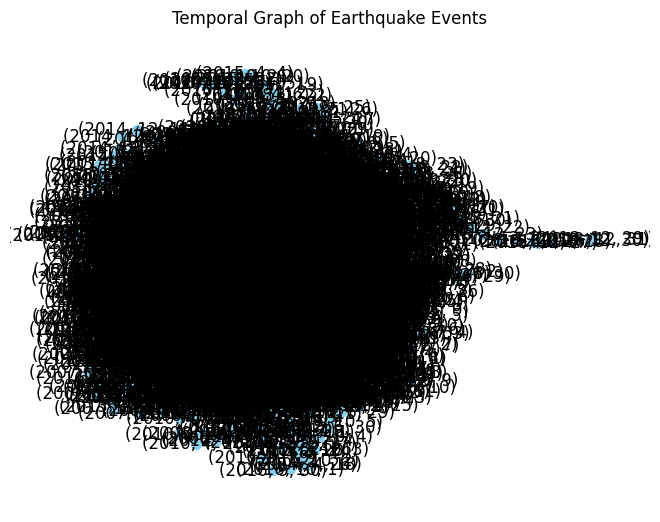

In [19]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from datetime import datetime

# Assuming your dataframe is already loaded and cleaned
# I'll use 'cleaned_data' as the starting point for this example

# Parse the 'source_origin_time' to datetime, extracting year, month, and day
cleaned_data['datetime'] = pd.to_datetime(cleaned_data['source_origin_time'], format='%Y-%m-%d %H:%M:%S.%f')  # Adjust format as per your data

# Now, extract year, month, and day
cleaned_data['Year'] = cleaned_data['datetime'].dt.year
cleaned_data['Month'] = cleaned_data['datetime'].dt.month
cleaned_data['Day'] = cleaned_data['datetime'].dt.day

# Create a temporal graph
G = nx.DiGraph()

# Add nodes with a unique identifier for each date (Year, Month, Day)
nodes = [(row['Year'], row['Month'], row['Day']) for index, row in cleaned_data.iterrows()]
G.add_nodes_from(nodes)

# Since we're dealing with temporal data, let's ensure the dates are sorted
sorted_dates = sorted(set(nodes))  # Removing duplicates and sorting

# Add edges to represent consecutive days
for i in range(len(sorted_dates) - 1):
    G.add_edge(sorted_dates[i], sorted_dates[i + 1])

# Optionally, add more attributes to nodes here

# Visualize the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=50, node_color='skyblue')
plt.title("Temporal Graph of Earthquake Events")
plt.show()
